In [65]:
# import torch
# from torch import nn
# from d2l import torch as d2l

# batch_size = 256
# train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [66]:
# num_inputs, num_outputs, num_hiddens = 784, 10, 256

# W1 = nn.Parameter(torch.randn(
#     num_inputs, num_hiddens, requires_grad=True) * 0.01)
# b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
# W2 = nn.Parameter(torch.randn(
#     num_hiddens, num_outputs, requires_grad=True) * 0.01)
# b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

# params = [W1, b1, W2, b2]

In [67]:
# def relu(X):
#     a = torch.zeros_like(X)
#     return torch.max(X, a)

In [68]:
# def net(X):
#     X = X.reshape((-1, num_inputs))
#     H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
#     return (H@W2 + b2)

In [69]:
# loss = nn.CrossEntropyLoss(reduction='none')

In [70]:
# num_epochs, lr = 10, 0.1
# updater = torch.optim.SGD(params, lr=lr)
# d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

In [71]:
# d2l.predict_ch3(net, test_iter)

In [48]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 加载数据
batch_size = 256
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

In [49]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])
train_dataset = datasets.FashionMNIST(root='../data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='../data', train=False, download=True, transform=transform)
train_iter = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_iter = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [50]:
# 定义多层感知机模型
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense1 = nn.Linear(784, 256)
        self.dense2 = nn.Linear(256, 10)
        
    def forward(self, X):
        X = X.reshape((-1, 784))  # Flatten input
        H = torch.relu(self.dense1(X))  # Hidden layer with ReLU activation
        return self.dense2(H)  # Output layer

In [51]:
# 创建模型
net = MLP()

In [52]:
# 损失函数和优化器
loss = nn.CrossEntropyLoss()
updater = torch.optim.SGD(net.parameters(), lr=0.1)

Epoch 1, Loss: 0.6691, Accuracy: 0.7659
Epoch 2, Loss: 0.4749, Accuracy: 0.8281
Epoch 3, Loss: 0.4220, Accuracy: 0.8464
Epoch 4, Loss: 0.3959, Accuracy: 0.8564
Epoch 5, Loss: 0.3750, Accuracy: 0.8649
Epoch 6, Loss: 0.3611, Accuracy: 0.8695
Epoch 7, Loss: 0.3471, Accuracy: 0.8745
Epoch 8, Loss: 0.3341, Accuracy: 0.8786
Epoch 9, Loss: 0.3240, Accuracy: 0.8832
Epoch 10, Loss: 0.3141, Accuracy: 0.8868


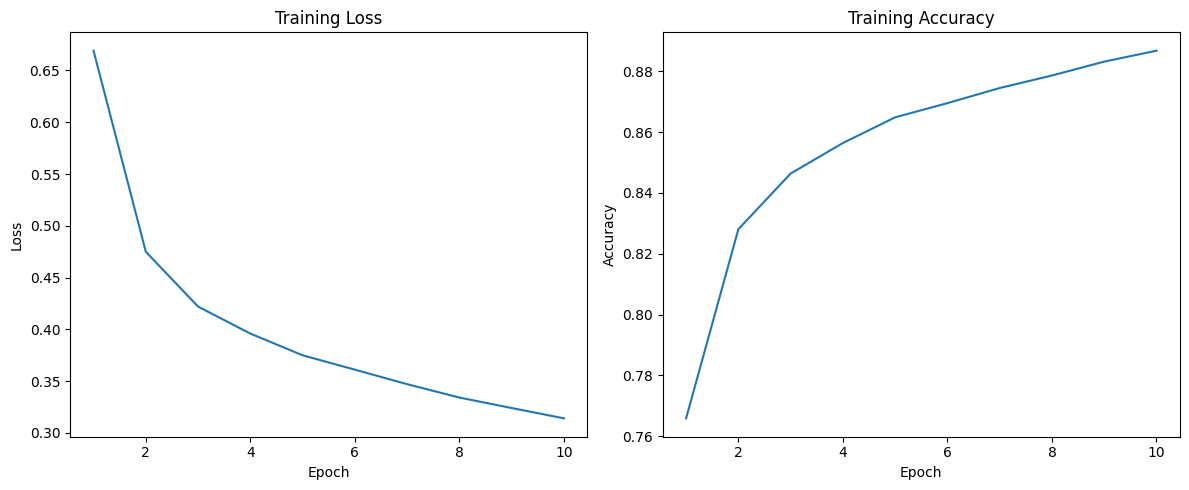

In [53]:
# 训练模型并记录损失和准确度
num_epochs = 10
train_losses, train_accuracies = [], []

for epoch in range(num_epochs):
    net.train()
    train_loss, correct, total = 0.0, 0, 0
    for X, y in train_iter:
        X, y = X.view(X.shape[0], -1), y  # Flatten X
        output = net(X)  # Forward pass
        l = loss(output, y)  # Compute loss
        updater.zero_grad()
        l.backward()  # Backward pass
        updater.step()  # Update weights

        train_loss += l.item() * X.shape[0]  # Accumulate loss
        _, predicted = output.max(1)  # Get predictions
        correct += (predicted == y).sum().item()
        total += y.size(0)

    train_losses.append(train_loss / total)
    train_accuracies.append(correct / total)

    print(f"Epoch {epoch + 1}, Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.4f}")

# 绘制训练过程中的损失和准确度变化
plt.figure(figsize=(12, 5))

# 绘制损失
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

# 绘制准确度
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")

plt.tight_layout()
plt.show()

Test Accuracy: 0.8629


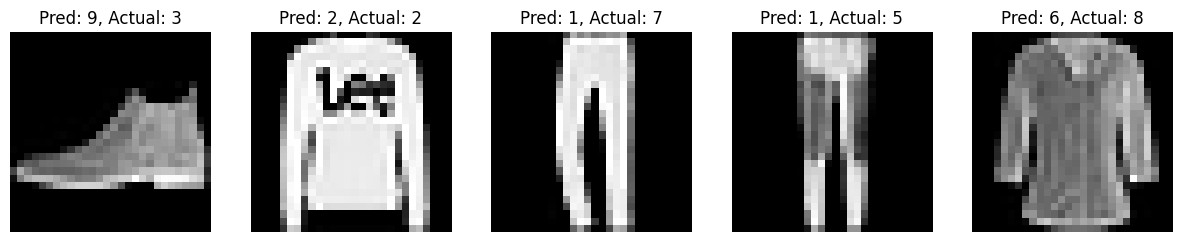

In [59]:
# 进行预测并显示预测结果
def predict(net, test_iter):
    net.eval()  # 设置模型为评估模式
    correct, total = 0, 0
    predictions = []
    images = []
    with torch.no_grad():
        for X, y in test_iter:
            X = X.view(X.shape[0], -1)  # Flatten input
            output = net(X)  # Forward pass
            _, predicted = output.max(1)  # Get predictions
            predictions.extend(predicted.numpy())  # Store predictions
            images.extend(X.view(-1, 28, 28).numpy())  # Store images
            correct += (predicted == y).sum().item()
            total += y.size(0)
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy:.4f}")
    return images, predictions, y.numpy()

# 获取预测结果
images, predictions, actuals = predict(net, test_iter)

# 显示前5个预测结果
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):
    ax = axes[i]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Pred: {predictions[i]}, Actual: {actuals[i]}")
    ax.axis('off')
plt.show()